# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=2_000_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=True # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli_start='best/v2_malli_base_dev'
perusmalli='best/v2_malli_base_dev'
perusresults='results/v2_malli_base_dev_stoch'
prefmalli='best/v2_malli_perus_prefnoise'
prefresults='results/v2_perus_results_prefnoise'
debug=False # jos True, niin ajetaan vain yhdellä prosessilla. Nopeampi debugata.
plotdebug=False # tulostetaanko rivi riviltä mitä tapahtuu

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [5]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.run_results(debug=debug,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=False,cont=True,start_from=perusmalli_start,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage,learning_rate=0.25)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.996    |
| fps                | 2961     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0167  |
| total_timesteps    | 21816    |
| value_loss         | 0.0486   |
-----

---------------------------------
| explained_variance | 0.971    |
| fps                | 3204     |
| nupdates           | 60       |
| policy_entropy     | 0.879    |
| policy_loss        | 0.0428   |
| total_timesteps    | 1308960  |
| value_loss         | 0.382    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 3203     |
| nupdates           | 70       |
| policy_entropy     | 0.917    |
| policy_loss        | -0.04    |
| total_timesteps    | 1527120  |
| value_loss         | 0.266    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 3201     |
| nupdates           | 80       |
| policy_entropy     | 0.962    |
| policy_loss        | -0.025   |
| total_timesteps    | 1745280  |
| value_loss         | 0.197    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 3195     |
| nupdates           | 330      |
| policy_entropy     | 1        |
| policy_loss        | -0.0154  |
| total_timesteps    | 7199280  |
| value_loss         | 0.0304   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3194     |
| nupdates           | 340      |
| policy_entropy     | 1        |
| policy_loss        | -0.00743 |
| total_timesteps    | 7417440  |
| value_loss         | 0.0234   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 3194     |
| nupdates           | 350      |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0121  |
| total_timesteps    | 7635600  |
| value_loss         | 0.0357   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 3193     |
| nupdates           | 600      |
| policy_entropy     | 0.99     |
| policy_loss        | -0.016   |
| total_timesteps    | 13089600 |
| value_loss         | 0.0276   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3193     |
| nupdates           | 610      |
| policy_entropy     | 0.988    |
| policy_loss        | -0.00884 |
| total_timesteps    | 13307760 |
| value_loss         | 0.0192   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3194     |
| nupdates           | 620      |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0127  |
| total_timesteps    | 13525920 |
| value_loss         | 0.0186   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3121     |
| nupdates           | 870      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.00796 |
| total_timesteps    | 18979920 |
| value_loss         | 0.0189   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3119     |
| nupdates           | 880      |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0139  |
| total_timesteps    | 19198080 |
| value_loss         | 0.0222   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3118     |
| nupdates           | 890      |
| policy_entropy     | 1        |
| policy_loss        | -0.0116  |
| total_timesteps    | 19416240 |
| value_loss         | 0.0192   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

Widget Javascript not detected.  It may not be installed or enabled properly.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

Ave reward 222.54767450566146


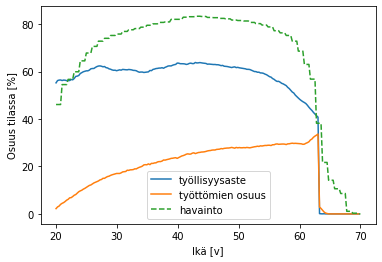

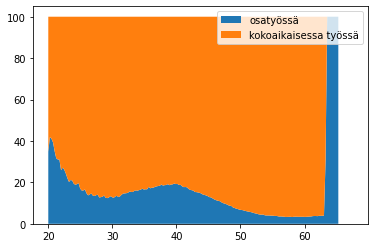

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


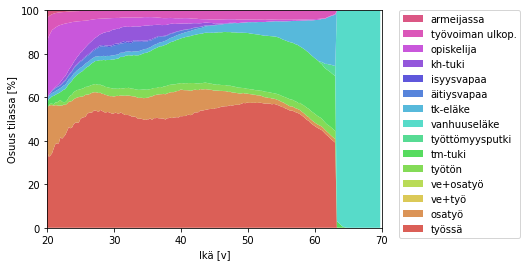

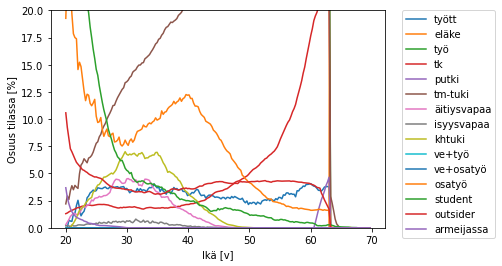

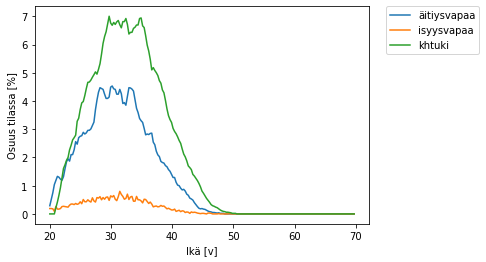

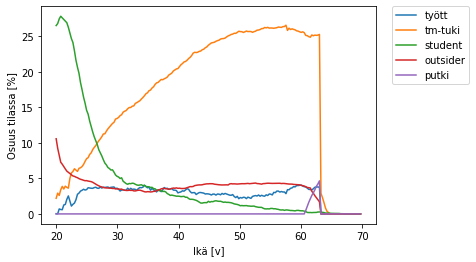

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


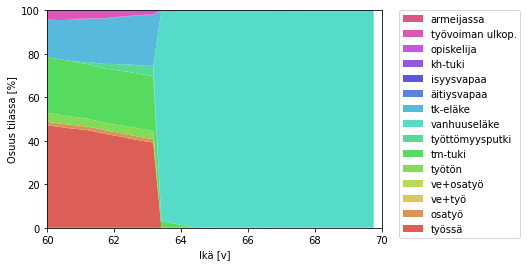

Rahavirrat skaalattuna väestötasolle
+------------------+----------------------+----------------------+-----------------------+
|                  |                  e/v |              toteuma |                   ero |
|------------------+----------------------+----------------------+-----------------------|
| palkkatulo       | 67,762,966,653.49    | 89,134,200,000.00    | -21,371,233,346.51    |
| etuusmeno        | 47,720,683,818.45    | 36,945,147,749.00    |  10,775,536,069.45    |
| verot+maksut     | 24,766,146,410.89    | 30,763,000,000.00    |  -5,996,853,589.11    |
| muut tulot       | 22,954,537,407.56    |  6,182,147,749.00    |  16,772,389,658.56    |
| valtionvero      |  2,485,920,586.71    |  5,542,000,000.00    |  -3,056,079,413.29    |
| kunnallisvero    | 15,403,051,662.09    | 18,991,000,000.00    |  -3,587,948,337.91    |
| ptel             |  4,223,604,089.52    |  5,560,000,000.00    |  -1,336,395,910.48    |
| tyotvakmaksu     |  1,287,496,366.42    |  1,693,54

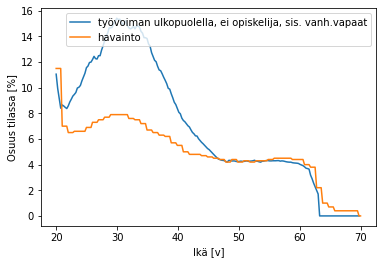

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.51 |      0.33 |       0.16 |      0.00 |        0.00 |
| 30-39 |     0.51 |      0.27 |       0.22 |      0.00 |        0.00 |
| 40-49 |     0.48 |      0.28 |       0.25 |      0.00 |        0.00 |
| 50-59 |     0.42 |      0.29 |       0.27 |      0.02 |        0.00 |
| 60-65 |     0.62 |      0.10 |       0.10 |      0.07 |        0.11 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.46 |      0.28 |       0.26 |      0.00 |        0.00 |
| 30-39 |     0.63 |      0.06 |       0.31 |      0.01 |        0.00 |
| 40-49 |     0.57 |      0.04 |       0.38 |      0.01 |        0.00 |
| 50-59 |     0.44 |      0.03 |       0.49 |      0.05 |        0.00 |
| 60-65 |     0.20 |      0.17 |       0.17 |      0.39 |        0.07 |
+-------+----------+-----------+------------+-----------+-------------+


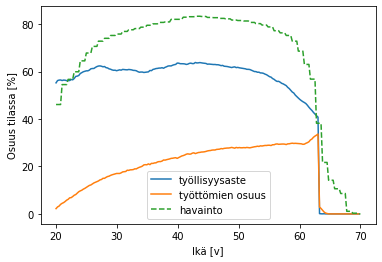

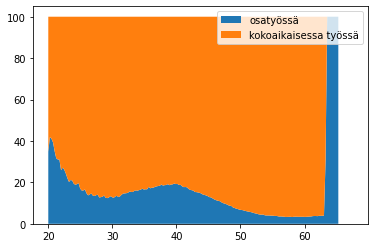

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


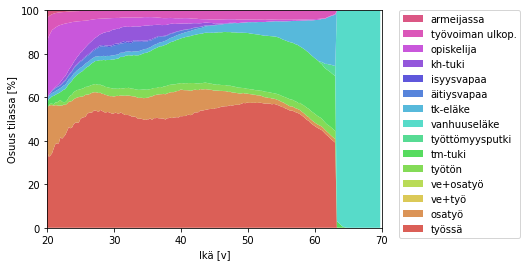

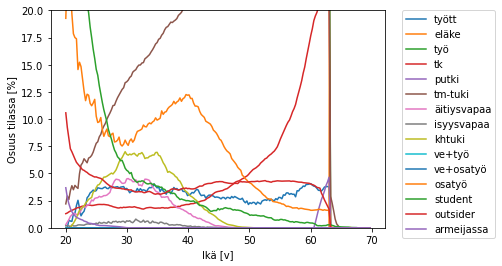

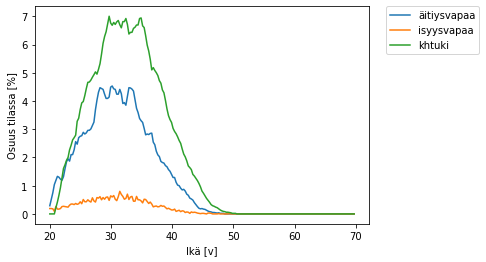

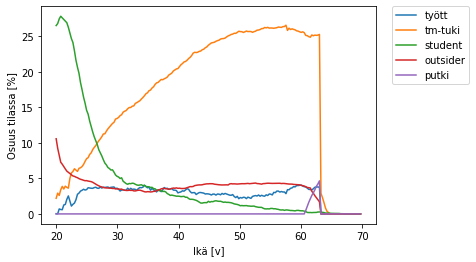

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


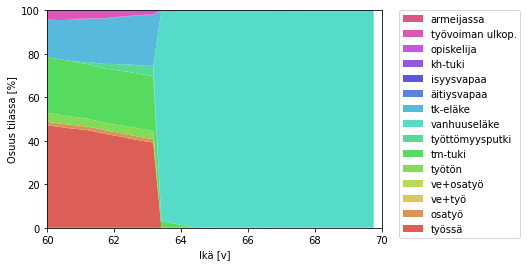

Lisäpäivillä on 4991 henkilöä


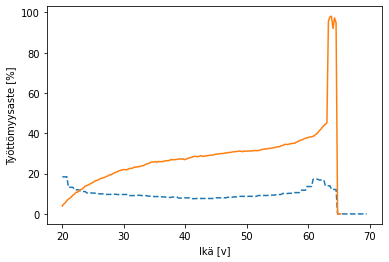

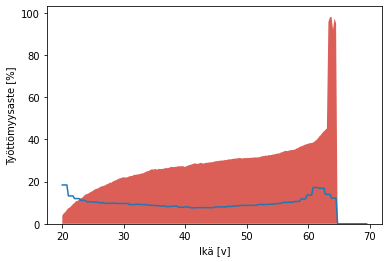

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


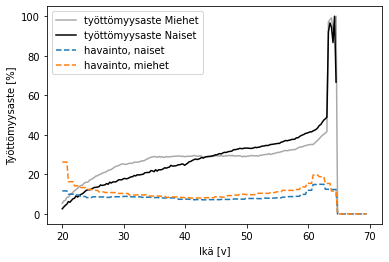

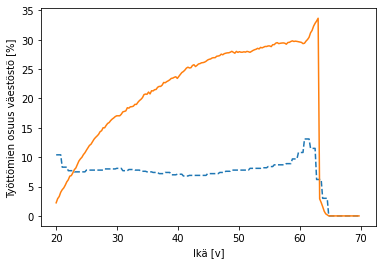

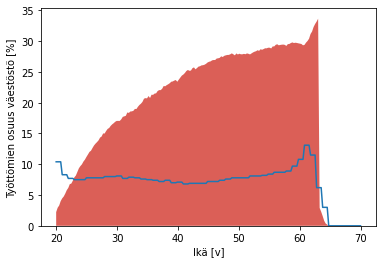

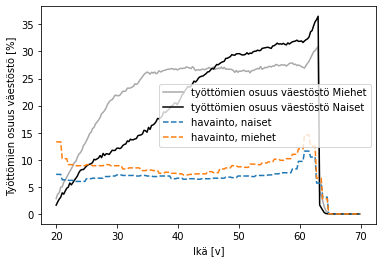

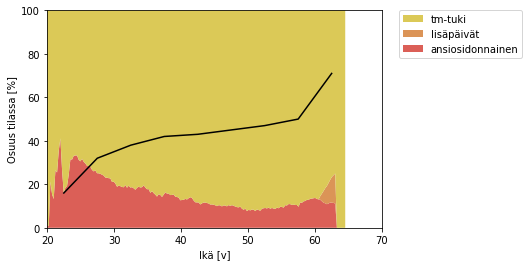

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


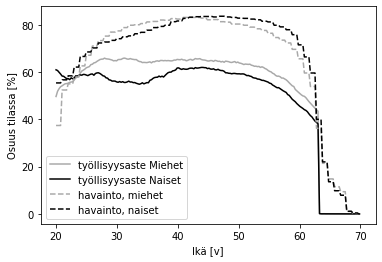

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


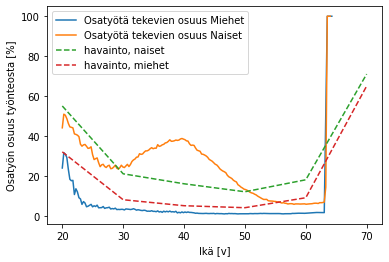

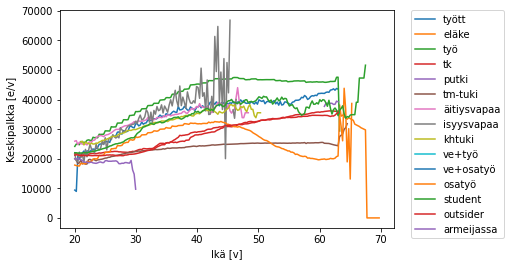

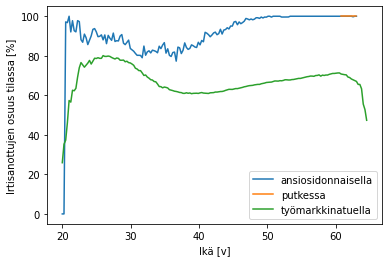

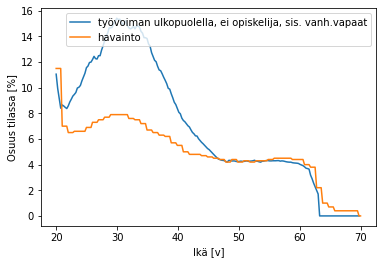

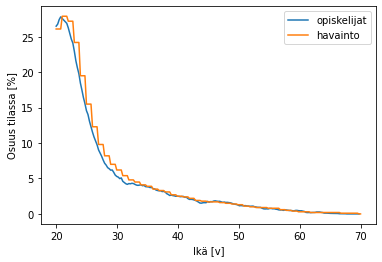

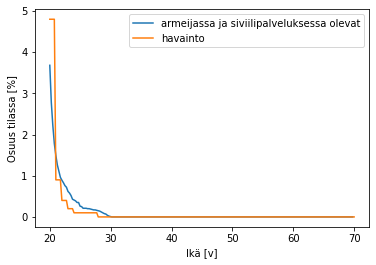

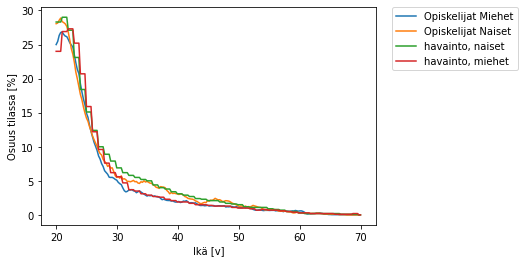

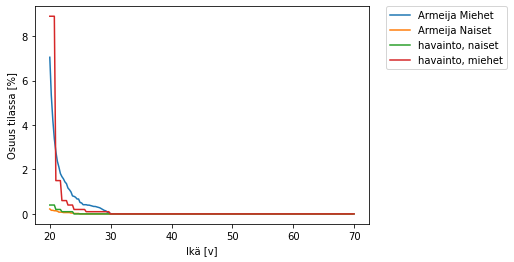

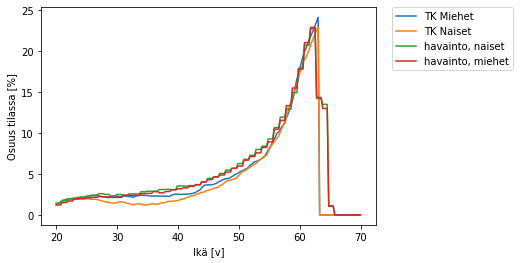

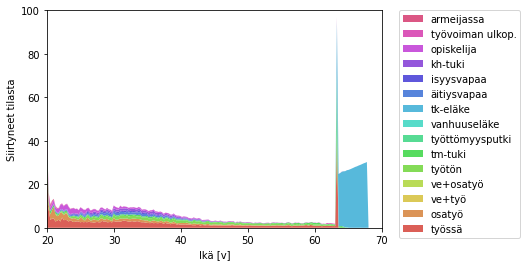

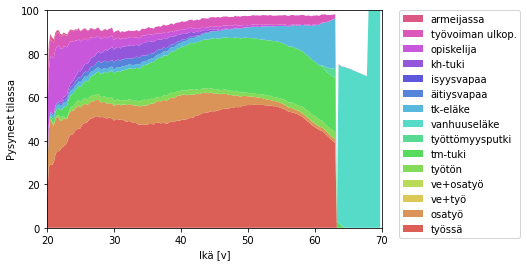

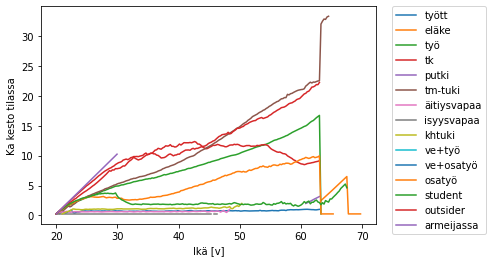

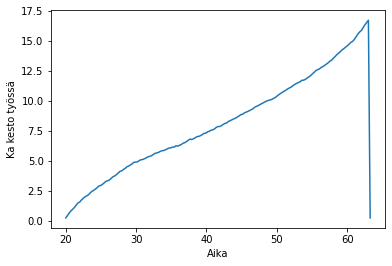

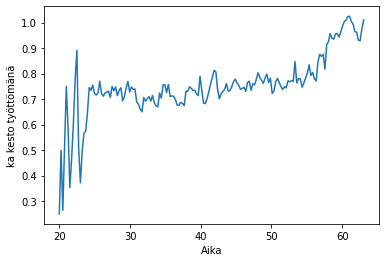

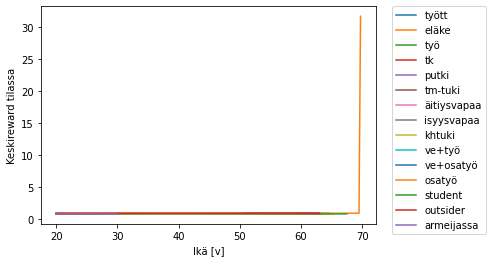

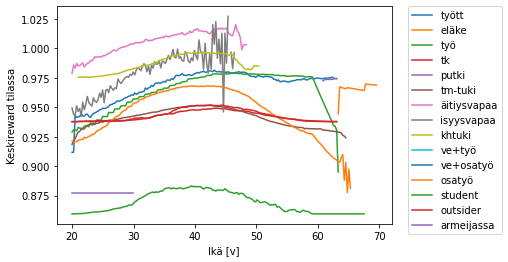

No handles with labels found to put in legend.


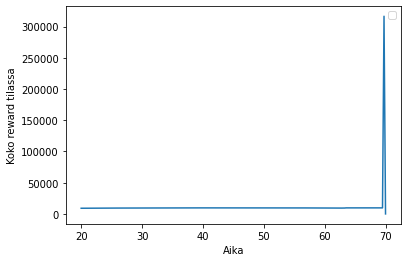

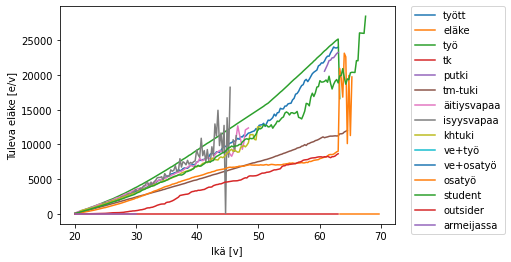

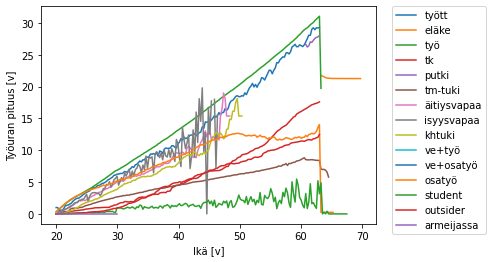

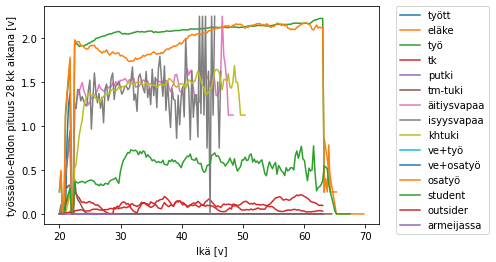

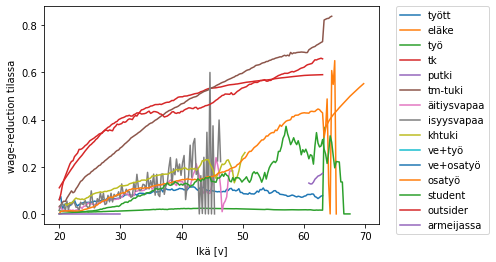

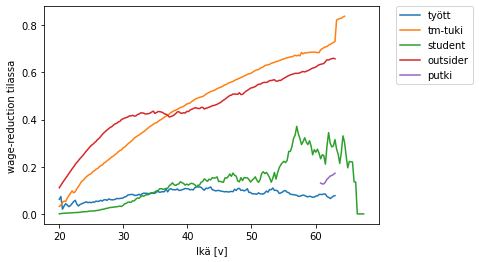

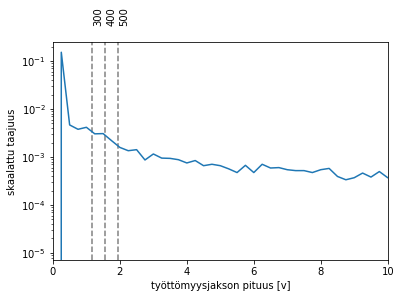

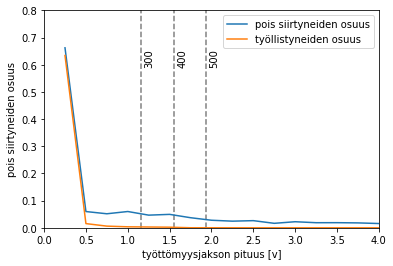

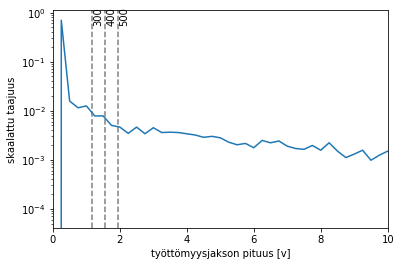

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


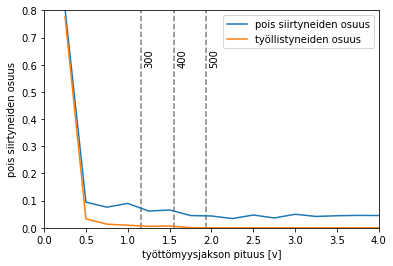

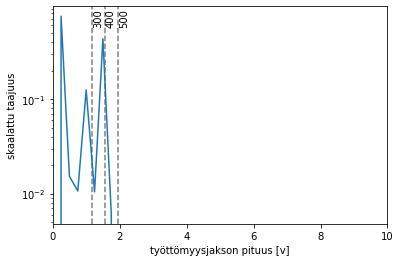

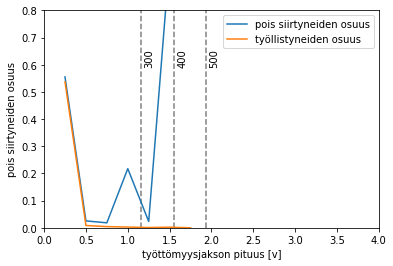

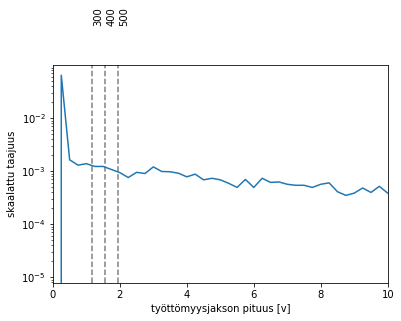

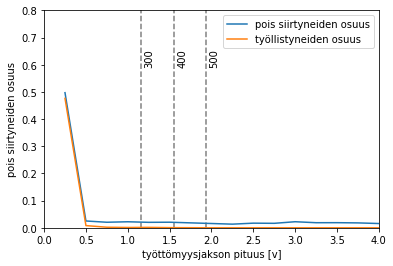

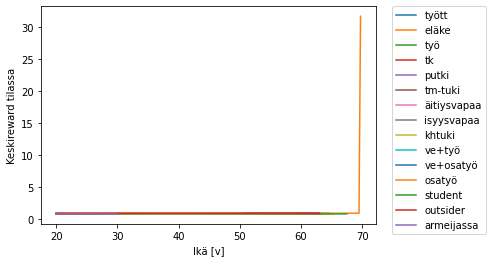

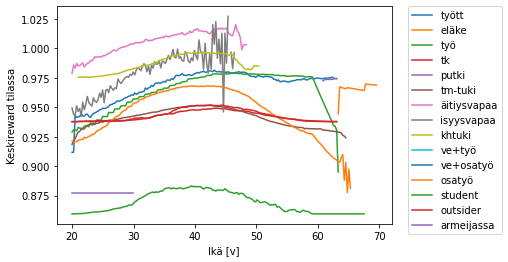

No handles with labels found to put in legend.


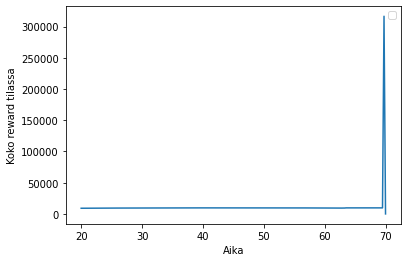

In [6]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)

cc1.render(load=perusresults,figname='v2_')